<h1><center>SUPERMARKET CUSTOMER</center></h1>

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import missingno as msno

import scipy
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest

In [102]:
# Load Datasheet
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\raw\Supermarket Customers.csv', delimiter= "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **DATA PREPARATION**

In [103]:
# Cek data type, null value, unique value for each variable
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Total rows 2240, Total Colum 29


,feature,data_type,null_value,n_unique,sample_unique
0,ID,int64,0.000000,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.000000,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.000000,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1.071429,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0.000000,3,"[0, 1, 2]"
6,Teenhome,int64,0.000000,3,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,0.000000,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0.000000,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


The description above shows the total number of rows, total columns, data types, number of unique, and number of null values. In the **Dt_customer** column, we can see that the data type is **object**, so we have to change it to **datetime** data type. And there are **1.071429** percent **missing value** in column **Income** that we have to handle it. 

In [104]:
# Change data type of Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format= '%d-%m-%Y')

In [105]:
# To validate the change of Dt_Customer's data type
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


##### In column education, value 2n Cycle and master has the same education level. So, we need to replace education level '2n Cycle' into 'Master'. This fact is corroborated by classified on website [Studera.nu](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=Second%20cycle%20corresponds%20to%20graduate,offered%20at%20all%20three%20cycles.).

In [106]:
# replace value 2n Cycle
df.Education = df.Education.replace('2n Cycle', 'Master')

In [107]:
# to validate the replaced value
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

#### **ADDING COLUMN**

##### In our opinion, we should to add column campaignAccept to knowing that reason customer to buy a something in supermarket because have accepted the campaign or not

In [108]:
# function to split that customer never accepted the campaign or accepted once or more
def campaign(df):
    if df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']].sum() == 0:
        return 'Never Accepted'
    else :
        return 'Accepted once or more'

df['campaignAccept'] = df.apply(campaign, axis=1)

In [109]:
# to validate the value of customer campaign accept
df.campaignAccept.value_counts()

campaignAccept
Never Accepted           1631
Accepted once or more     609
Name: count, dtype: int64

In [110]:
# adding column total amount for analyze data
totalAmount = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.insert(15, 'totalAmount', totalAmount)

#### **DELETING COLUMN**

##### In the **Z_CostContact** and **Z_Revenue** columns we will drop the columns, because they only contain one sample unique and have no effect on other variables. 

In [112]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

#### **CHECK DUPLICATE**

In [113]:
# check duplicated
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept


## **CHECK MISSING VALUE**

In [114]:
# Check missing value 
missing_value = df.isna().sum()
missing_value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
totalAmount             0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
campaignAccept          0
dtype: int64

In [115]:
missing_valuedict = dict(missing_value)
for key, value in missing_valuedict.items():
    if value != 0:
        print (f'There are {value} rows missing values in coulumn {key}')

There are 24 rows missing values in coulumn Income


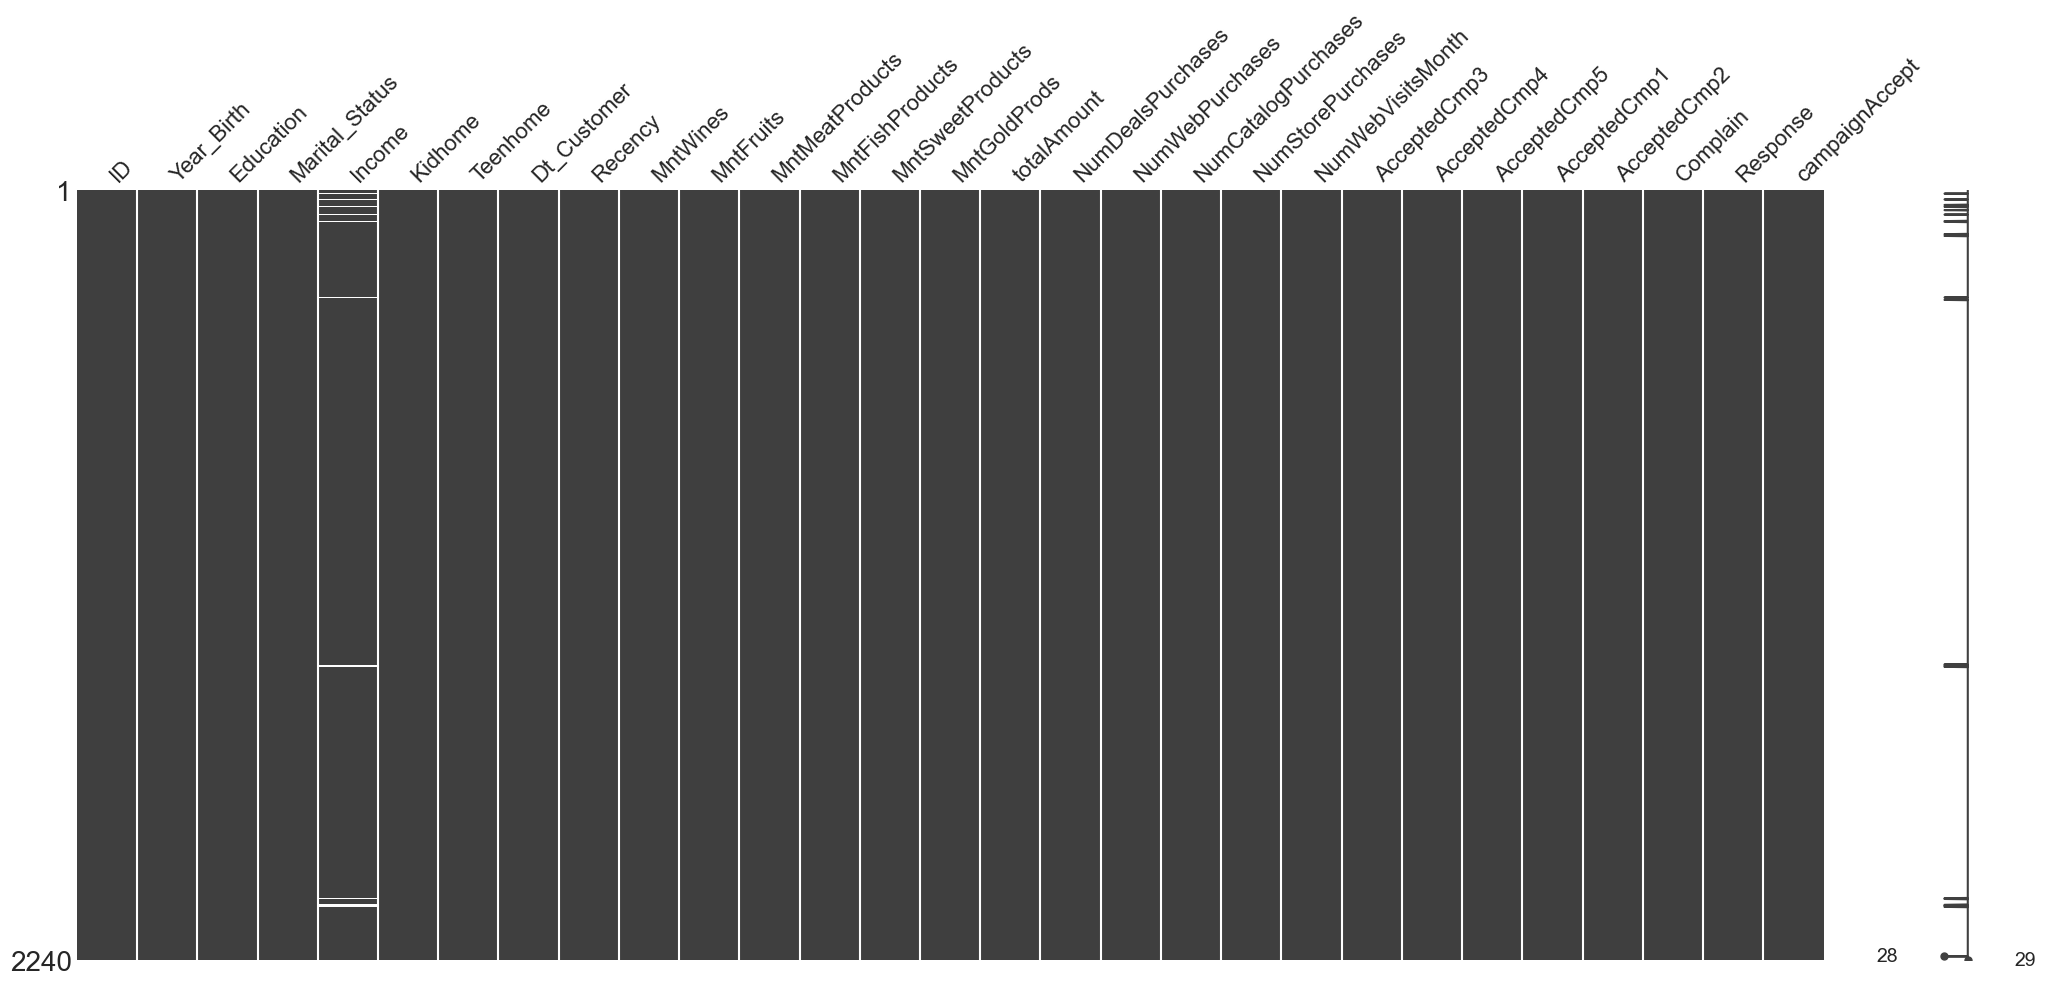

In [116]:
# Check missing value missingno graph 
msno.matrix(df);

In [117]:
# Check missing value using '0'(zero) values
df[df['ID'] == 0 ] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept
214,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,9,1,0,0,0,0,0,0,0,Never Accepted


It turns out that after tracing deeper, in the ID column, there is an ID that has a 0(zero) value

## **HANDLING MISSING VALUE**

**1. Handling missing value in column ID.**
    
We don't delete the missing value in column ID because it is important to indentify each customer. In the ID column, when we viewed from the value, it tends to contain random numbers. So, to fill in the missing value, we using a contain random numbers there has not been contained in column ID.

In [118]:
# Iteration to find a contain random number
i = 1
while True: 
    if i not in df['ID']:
        np.random.seed(9999)
        newID = np.random.randint(low= 500, high= 10000)
        i += 1
        break
    else: 
        i += 1

newID

8778

In [119]:
# To validate the number of newID has not been contained in column ID
df[df['ID'] == newID]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept


In [120]:
# Fill the missing value using newID
df.ID.replace(0, newID, inplace=True)

In [121]:
# To validate that the missing value has been removed
df[df['ID'] == 0 ]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept


In [122]:
df.sort_values(by='ID')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept
822,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,0,1,Accepted once or more
1511,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,0,0,0,0,0,0,0,Never Accepted
1654,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,3,6,0,0,0,0,0,0,0,Never Accepted
1906,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,7,5,0,0,0,0,0,0,0,Never Accepted
768,20,1965,Master,Married,46891.0,0,1,2013-09-01,91,43,...,4,4,0,0,0,0,0,0,0,Never Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,11178,1972,Master,Single,42394.0,1,0,2014-03-23,69,15,...,3,7,0,0,0,0,0,0,0,Never Accepted
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,Never Accepted
2183,11187,1978,Basic,Single,26487.0,1,0,2013-05-20,23,2,...,3,5,0,0,0,0,0,0,0,Never Accepted
997,11188,1957,Graduation,Together,26091.0,1,1,2014-02-25,84,15,...,3,5,0,0,0,0,0,0,0,Never Accepted


**2. Handling missing value in column Income**

We don't delete the missing value because we afraid that missing value could be affected to analyze the data. To fill in the missing value, first step we should to be find descriptive statistic about the data

In [123]:
# describe value in column income
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [124]:
# Find the rows of missing value in column Income
df[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,Never Accepted
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,Never Accepted
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,4,2,0,0,0,0,0,0,0,Never Accepted
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,4,6,0,0,0,0,0,0,0,Never Accepted
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,3,6,0,0,0,0,0,0,0,Never Accepted
71,10629,1973,Master,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,Never Accepted
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,Never Accepted
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,Never Accepted
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,8,1,0,0,0,0,0,0,0,Never Accepted
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,Never Accepted


**Check normality of Data**

In [125]:
# Descriptive Statistic before fill in the missing value
MeanFirst = df[~df['Income'].isna()]['Income'].mean()
MedianFirst = df[~df['Income'].isna()]['Income'].median()
SkewnessFirst = df[~df['Income'].isna()]['Income'].skew()
KurtosisFirst = df[~df['Income'].isna()]['Income'].kurt()
StdDevFirst = df[~df['Income'].isna()]['Income'].std()



print(f"Mean: {MeanFirst}")
print(f"Median: {MedianFirst}")
print(f"Skewness: {SkewnessFirst}")
print(f"Kurtosis: {KurtosisFirst}")
print(f"Standar Devaiation: {StdDevFirst}")

Mean: 52247.25135379061
Median: 51381.5
Skewness: 6.7634873728111184
Kurtosis: 159.63669957780044
Standar Devaiation: 25173.076660901403


C:\Users\user\AppData\Local\Temp\ipykernel_8028\4017306447.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


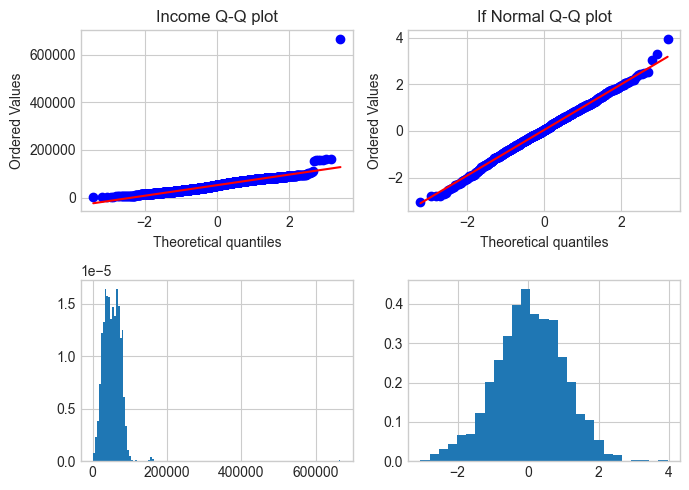

In [126]:
# Graphical test
plt.style.use('seaborn-whitegrid')

dataFirst = df[~df['Income'].isna()]['Income']
datanorm = stats.norm.rvs(size=1000, random_state=1)

fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# Q-Q plot
stats.probplot(dataFirst, dist=stats.norm, plot=axes[0, 0])
stats.probplot(datanorm, dist=stats.norm, plot=axes[0, 1])

axes[0, 0].set_title('Income Q-Q plot')
axes[0, 1].set_title('If Normal Q-Q plot')
axes[1, 0].hist(dataFirst, density=True, bins='auto')
axes[1, 1].hist(datanorm, density=True, bins='auto')

fig.tight_layout()

**Check normality of Data in column income with saphiro-wilk test**
    
This is a hypotheses test and the two hypotheses are as follows:

- Ho : Sample is from the normal distributions.
- Ha : Sample is not from the normal distributions.

In [127]:
from scipy.stats import shapiro

# conduct the  Shapiro-Wilk Test
stat, pvalue = shapiro(~df['Income'].isna())

if pvalue > 0.05:
    print(f'Distribution of the data is normal because pvalue: {pvalue}')
else:
    print(f'Distribution of the data is not normal because pvalue: {pvalue}')

Distribution of the data is not normal because pvalue: 0.0


**Measure of Central Tendency of The Data's**

Because the distribution of the Income's Data is **not normal**, the measure of central tendency of the Data is **median**. For fill in the missing value, we should be to use the median of the variables may be affected to the Income. After knowing that descriptive statistic about the data, then find the variables that might be affected to Income. According to a journal [*The Influence of Education Level, Gender, Race, Marital Status, Age, and Occupation on the Wage of the General Population* (by Ronghai Xie, 2022)](https://www.atlantis-press.com/proceedings/icssed-22/125973814), variabel Gender, Race, Marital Status, Age, and Occupation might be affected to Income. From the data, we just found variabel Marital Status, Year Birth, and Education Level. After that, we try to calculate the correlation and signification between Income and variabel(Marital Status, Age from Year Birth column, and Education Level).

In [128]:
# insert variable age
df.insert(3, 'Age', 2023 - df['Year_Birth'])

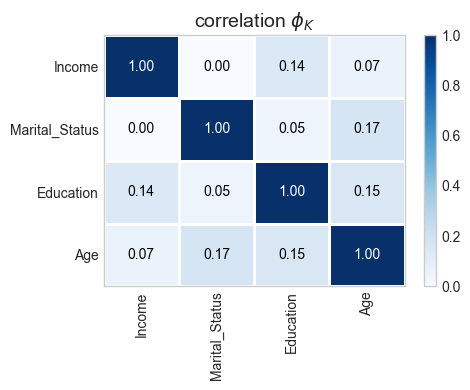

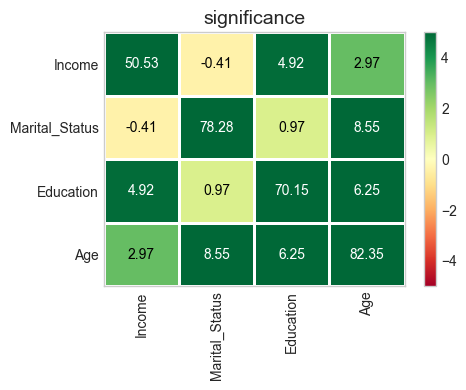

In [129]:
# check correlation and signification between income with variable(Age, Education, Marital Status)
phik_overview = df[['Age','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Age', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(5,4))

significance_overview = df[['Age','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Age', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1, figsize=(5,4))
plt.tight_layout()

After knowing the correlation and significance of each variable on Income, we will only take the variables of **Age** and **Education** because they have high value of significance, even though the correlation value is not so high. As for the **Marital Status** variable, it is not taken because the correlation value is low and the significance value is minus

In [130]:
# Find the median of Income and group by with Age and Education
tableForFill = df.groupby(['Age', 'Education']).agg({'Income':'median'}).reset_index()
tableForFill['Income'] = round(tableForFill['Income'], 2) 
tableForFill

,Age,Education,Income
0,27,Basic,14421.0
1,27,Master,7500.0
2,28,Graduation,34824.0
3,28,Master,81937.0
4,29,Graduation,80685.0
...,...,...,...
183,82,PhD,93027.0
184,83,PhD,51141.0
185,123,Master,36640.0
186,124,PhD,83532.0


In [131]:
# find the rows of the missing value and separated to a new dataframe

df_NullIncome = df[df['Income'].isna()] #separated the null value
df_notNullIncome = df[~df['Income'].isna()] #separated the non null value

In [132]:
# Iteration to find Income value where the Age and Education value in the dataframe are same with Age and Education value in the tableForFill value.
x = [] #save the result of iteration in the new variable
for i in df_NullIncome.index:
    for j in tableForFill.index:
        if df_NullIncome['Age'][i] == tableForFill['Age'][j] and df_NullIncome['Education'][i] == tableForFill['Education'][j]:
            x.append(tableForFill['Income'][j])
            break

In [133]:
# fill the missing value with the result of iteration (variable x)
df_NullIncome['Income'] = np.array(x)

C:\Users\user\AppData\Local\Temp\ipykernel_8028\3355550941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NullIncome['Income'] = np.array(x)


In [134]:
# To validate the missing value of Income is not already exist
df_NullIncome[df_NullIncome['Income'].isna()]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept


In [135]:
# To validate the missing value of Income is filled in with the result of iteration (variable x)
df_NullIncome[df_NullIncome['Income'] == x]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept
10,1994,1983,Graduation,40,Married,37292.0,1,0,2013-11-15,11,...,2,7,0,0,0,0,0,0,0,Never Accepted
27,5255,1986,Graduation,37,Single,38508.0,1,0,2013-02-20,19,...,0,1,0,0,0,0,0,0,0,Never Accepted
43,7281,1959,PhD,64,Single,53195.5,0,0,2013-11-05,80,...,4,2,0,0,0,0,0,0,0,Never Accepted
48,7244,1951,Graduation,72,Single,55547.0,2,1,2014-01-01,96,...,4,6,0,0,0,0,0,0,0,Never Accepted
58,8557,1982,Graduation,41,Single,47737.5,1,0,2013-06-17,57,...,3,6,0,0,0,0,0,0,0,Never Accepted
71,10629,1973,Master,50,Married,38961.0,1,0,2012-09-14,25,...,3,8,0,0,0,0,0,0,0,Never Accepted
90,8996,1957,PhD,66,Married,41437.0,2,1,2012-11-19,4,...,8,9,0,0,0,0,0,0,0,Never Accepted
91,9235,1957,Graduation,66,Single,50388.0,1,1,2014-05-27,45,...,2,7,0,0,0,0,0,0,0,Never Accepted
92,5798,1973,Master,50,Together,38961.0,0,0,2013-11-23,87,...,8,1,0,0,0,0,0,0,0,Never Accepted
128,8268,1961,PhD,62,Married,63342.0,0,1,2013-07-11,23,...,7,6,0,0,0,0,0,0,0,Never Accepted


In [136]:
# Join the dataframe between dataframe null value and dataframe non null value
df = pd.concat([df_notNullIncome, df_NullIncome], ignore_index=True)
df

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept
0,5524,1957,Graduation,66,Single,58138.0,0,0,2012-09-04,58,...,4,7,0,0,0,0,0,0,1,Accepted once or more
1,2174,1954,Graduation,69,Single,46344.0,1,1,2014-03-08,38,...,2,5,0,0,0,0,0,0,0,Never Accepted
2,4141,1965,Graduation,58,Together,71613.0,0,0,2013-08-21,26,...,10,4,0,0,0,0,0,0,0,Never Accepted
3,6182,1984,Graduation,39,Together,26646.0,1,0,2014-02-10,26,...,4,6,0,0,0,0,0,0,0,Never Accepted
4,5324,1981,PhD,42,Married,58293.0,1,0,2014-01-19,94,...,6,5,0,0,0,0,0,0,0,Never Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,Graduation,52,Married,42075.5,1,1,2013-03-03,82,...,3,8,0,0,0,0,0,0,0,Never Accepted
2236,10339,1954,Master,69,Together,52884.5,0,1,2013-06-23,83,...,4,6,0,0,0,0,0,0,0,Never Accepted
2237,3117,1955,Graduation,68,Single,59925.0,0,1,2013-10-18,95,...,5,7,0,0,0,0,0,0,0,Never Accepted
2238,5250,1943,Master,80,Widow,71335.5,0,0,2013-10-30,75,...,11,1,0,0,1,0,0,0,1,Accepted once or more


**To validate after we filled in missing value in the data**

First, we check descriptive statistic of the data after we filled in missing value. Then, we should be to use two-sample Kolmogorov-Smirnov test for goodness of fit to validate that two dataframes are come from the same distribution.

In [137]:
# Descriptive Statistic after fill in the missing value
MeanFill = df['Income'].mean()
MedianFill = df['Income'].median()
SkewnessFill = df['Income'].skew()
KurtosisFill = df['Income'].kurt()
StdDevFill = df['Income'].std()



print(f"Mean after filled in: {MeanFill}, and Mean before filled in: {MeanFirst}")
print(f"Median after filled in: {MedianFill}, and Median before filled in: {MedianFirst}")
print(f"Skewness after filled in: {SkewnessFill}, and Skewness before filled in: {SkewnessFirst}")
print(f"Kurtosis after filled in: {KurtosisFill}, and Kurtois before filled in: {KurtosisFirst}")
print(f"Standart Deviation after filled in: {StdDevFill}, and Standart Deviation before filled in: {StdDevFirst}")

Mean after filled in: 52221.428125, and Mean before filled in: 52247.25135379061
Median after filled in: 51371.0, and Median before filled in: 51381.5
Skewness after filled in: 6.784671145442101, and Skewness before filled in: 6.7634873728111184
Kurtosis after filled in: 160.83885798957346, and Kurtois before filled in: 159.63669957780044
Standart Deviation after filled in: 25060.08037849815, and Standart Deviation before filled in: 25173.076660901403


C:\Users\user\AppData\Local\Temp\ipykernel_8028\3327547208.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


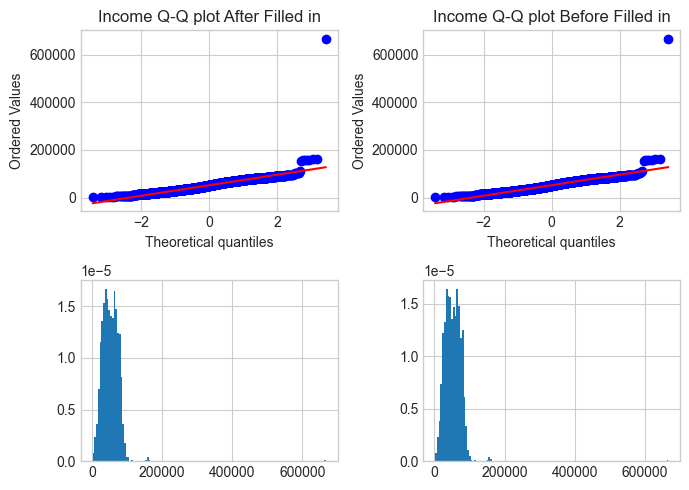

In [138]:
# Graphical test
plt.style.use('seaborn-whitegrid')

dataFill = df['Income']
datanorm = stats.norm.rvs(size=1000, random_state=1)

fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# Q-Q plot
stats.probplot(dataFill, dist=stats.norm, plot=axes[0, 0])
stats.probplot(dataFirst, dist=stats.norm, plot=axes[0, 1])

axes[0, 0].set_title('Income Q-Q plot After Filled in')
axes[0, 1].set_title('Income Q-Q plot Before Filled in')
axes[1, 0].hist(dataFill, density=True, bins='auto')
axes[1, 1].hist(dataFirst, density=True, bins='auto')

fig.tight_layout()

**Check normality with saphiro test after filled in missing value**
    
This is a hypotheses test and the two hypotheses are as follows:

- H0: Sample is from the normal distributions
- Ha: Sample is not from the normal distributions.

In [139]:
from scipy.stats import shapiro

# conduct the  Shapiro-Wilk Test
stat, pvalue = shapiro(df['Income'])

if pvalue > 0.05:
    print(f'Distribution of the data after we filled in is normal because pvalue: {pvalue}')
else:
    print(f'Distribution of the data after we filled in is not normal because pvalue: {pvalue}')

Distribution of the data after we filled in is not normal because pvalue: 0.0


**Two-sample Kolmogorov-Smirnov test for goodness of fit.**

Hypotesis:
- H0 : Two dataframes are come from the same distribution
- Ha : Two dataframes are not come from the same distribution

In [140]:
# two-sample Kolmogorov-Smirnov test for goodness of fit
from scipy.stats import ks_2samp
data1 = df_notNullIncome['Income']
data2 = df['Income']
stats, pvalue = scipy.stats.ks_2samp(data1, data2, alternative='two-sided', method='auto')

if pvalue > 0.05:
    print(f'Two dataframes are come from the same distribution because pvalue: {pvalue}')
else:
    print(f'Two dataframes are not come from the same distribution because pvalue: {pvalue}')

Two dataframes are come from the same distribution because pvalue: 1.0


From the result of two-sample Kolmogorov-Smirnov test for goodness of fit is that two dataframes are come the same distribution because **pvalue greater than 0.05 that is means accepted H0.** Otherwise the result are validating that original data and data after filled in has ***small distortion.***

In [141]:
# To Validate there is no missing value in the dataframe 
missing_value_final = df.isna().sum()
missing_value_final_dict = dict(missing_value_final)
for key, value in missing_value_final.items():
    if value != 0:
        print (f'There are {value} rows missing values in coulumn {key}')
    else : 
        print('There is no missing value in the dataframe')
        break

There is no missing value in the dataframe


## **HANDLING OUTLIERS**

Find the outliers in the numerical column

In [142]:
# find the lower bound and upper bound variable
def CheckBound(x):
    Q1 = int(x.quantile([0.25]).values)
    Q3 = int(x.quantile([0.75]).values)
    IQR = Q3-Q1
    LowerBound = Q1-1.5*IQR
    UpperBound = Q3+1.5*IQR

    result = f'''
        Lower Bound is: {LowerBound}\n
        Upper Bound is: {UpperBound}'''
    
    return UpperBound, LowerBound, result

<Axes: >

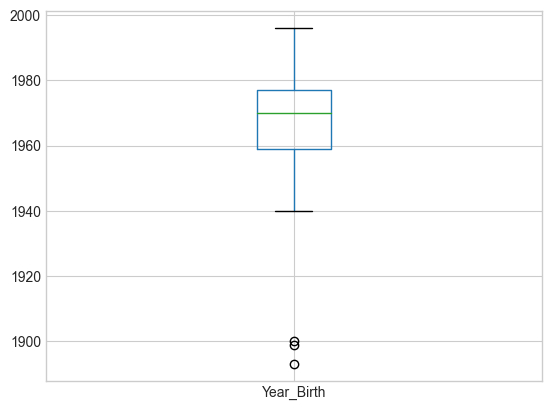

In [143]:
# find the outliers in Year_Birth column
dfYear = df[['Year_Birth']]
dfYear.boxplot(fontsize=10)

<Axes: >

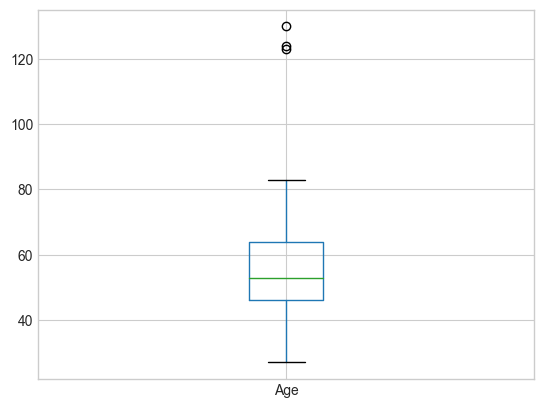

In [144]:
# find the outliers in Age column
dfAge = df[['Age']]
dfAge.boxplot()

<Axes: >

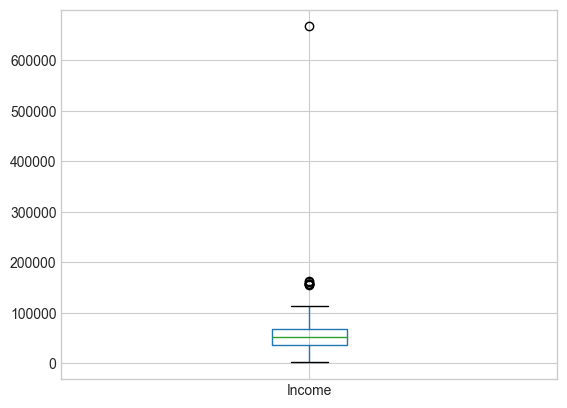

In [145]:
# find the outliers in Income column
dfIncome = df[['Income']]
dfIncome.boxplot()

<Axes: >

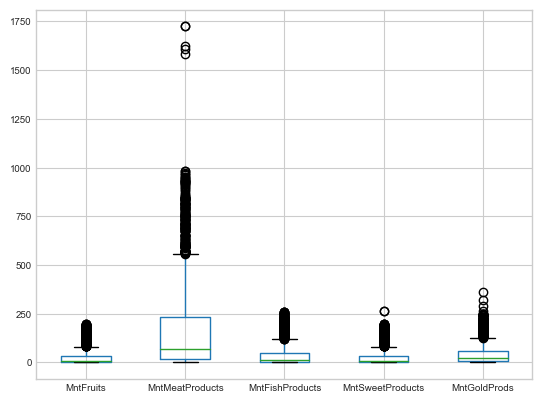

In [146]:
# find the outliers in MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds column
df2 = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df2.boxplot(fontsize=7)

<Axes: >

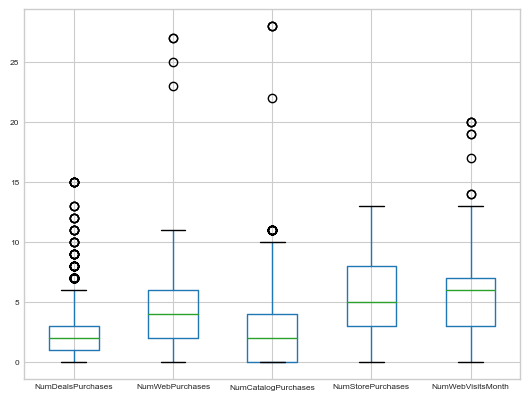

In [147]:
# find the outliers in NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth column
df3 = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
df3.boxplot(fontsize=6)

#### After knowing all the outliers from each column, it is necessary to handle outliers in age and Income because may be we need to use the outliers for analyze data. And outliers in other column, may be we don't to handle because it is still reasonable.

**Handling Outliers of Age**

In [148]:
# describe Year Birth data
df.Age.describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [149]:
# find the lower bound and upper bound of Age
resultAge = CheckBound(df.Age)
print(resultAge[2])


        Lower Bound is: 19.0

        Upper Bound is: 91.0


In [150]:
#find the data outliers of Age
df[df['Age'] > 91]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept
181,7829,1900,Master,123,Divorced,36640.0,1,0,2013-09-26,99,...,2,5,0,0,0,0,0,1,0,Never Accepted
228,11004,1893,Master,130,Single,60182.0,0,1,2014-05-17,23,...,2,4,0,0,0,0,0,0,0,Never Accepted
326,1150,1899,PhD,124,Together,83532.0,0,0,2013-09-26,36,...,4,1,0,0,1,0,0,0,0,Accepted once or more


In [151]:
# find the precentage of outliers
AgeOutliers = df[df['Age'] > resultAge[0]]
Precentage = len(AgeOutliers)/len(df.Age) * 100 

print(f'Precentages of outliers : {Precentage}')

Precentages of outliers : 0.13392857142857142


To handling the Age's outliers, we discretizating the age into some catogery. From  the literatures American Medical Associations through [U.S. Department of Health & Human Services](https://www.nih.gov/nih-style-guide/age) and [Age differences in demographic, social and health-related factors associated with loneliness across the adult life span (19–65 years): a cross-sectional study in the Netherlands *(Thanée Franssen, Mandy Stijnen, Femke Hamers & Francine Schneider, 2020)* ](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-09208-0), we can discretizating the Age to: 

- Infants (< 1 year)
- Children (1 year through 12 years)
- Teenagers (13 years through 18 years)
- Among young (19 years through 34 years)
- Early middle-aged adults (35 years through 49 years)
- Late middle-aged adults (50 years through 64 years)
- Older adults (65 and older)*

In [152]:
# discretization Age to five Category
def discretizatingAge(df):
    if df['Age'] < 1 :
        return "Infants"
    elif df['Age'] >= 1 and df['Age'] <= 12:
        return "Childern"
    elif df['Age'] >= 13 and df['Age'] <= 18:
        return "Teenager"
    elif df['Age'] >= 19 and df['Age'] <= 34:
        return "Among young"
    elif df['Age'] >= 35 and df['Age'] <= 49:
        return "Early middle-aged adults"
    elif df['Age'] >= 50 and df['Age'] < 65:
        return "Late middle-aged adults"
    else:
        return "Older Adults"
    
df['discretizatingAge'] = df.apply(discretizatingAge, axis=1)

In [153]:
# to validate discretization
df.head()

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept,discretizatingAge
0,5524,1957,Graduation,66,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,1,Accepted once or more,Older Adults
1,2174,1954,Graduation,69,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,0,Never Accepted,Older Adults
2,4141,1965,Graduation,58,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults
3,6182,1984,Graduation,39,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults
4,5324,1981,PhD,42,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults


**Handling Outliers of Income**

In [154]:
# describe data Income
df.Income.describe()

count      2240.000000
mean      52221.428125
std       25060.080378
min        1730.000000
25%       35502.500000
50%       51371.000000
75%       68325.000000
max      666666.000000
Name: Income, dtype: float64

In [155]:
# find the lower bound and upper bound of Income
resultIncome = CheckBound(df.Income)
print(resultIncome[2])


        Lower Bound is: -13732.5

        Upper Bound is: 117559.5


In [156]:
#find the data outliers of Income 
df[df['Income'] > 117559.5]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept,discretizatingAge
153,8475,1973,PhD,50,Married,157243.0,0,1,2014-03-01,98,...,0,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults
604,1503,1976,PhD,47,Together,162397.0,1,1,2013-06-03,31,...,1,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults
642,5555,1975,Graduation,48,Divorced,153924.0,0,0,2014-02-07,81,...,0,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults
674,1501,1982,PhD,41,Married,160803.0,0,0,2012-08-04,21,...,0,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults
1287,5336,1971,Master,52,Together,157733.0,1,0,2013-06-04,37,...,1,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults
1636,4931,1977,Graduation,46,Together,157146.0,0,0,2013-04-29,13,...,1,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults
2109,11181,1949,PhD,74,Married,156924.0,0,0,2013-08-29,85,...,0,0,0,0,0,0,0,0,Never Accepted,Older Adults
2209,9432,1977,Graduation,46,Together,666666.0,1,0,2013-06-02,23,...,6,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults


In [157]:
# find the precentage of outliers
IncomeOutliers = df[df['Income'] > resultIncome[0]]
Precentage = len(IncomeOutliers)/len(df.Income) * 100 

print(f'Precentages of outliers : {Precentage}')

Precentages of outliers : 0.35714285714285715


To handling the Income's outliers, we discretizating the income into some catogery. We used the median and MAD to discretizating the income.

In [158]:
# find the median and MAD
IncomeMed = df.Income.median()
IncomeMAD = abs(df.Income - df.Income.median()).median()

Lower = IncomeMed-IncomeMAD
Upper = IncomeMed+IncomeMAD

print(f'Median : {IncomeMed}, MAD : {IncomeMAD}\n Lower :{Lower}, Upper : {Upper}')

Median : 51371.0, MAD : 16422.5
 Lower :34948.5, Upper : 67793.5


In [159]:
# discretization Income by median and MAD
def discretizatingIncome(df):
    if 67793.5 > df['Income'] > 34948.5 :
        return "$34948.5 - $67793.5"
    elif df['Income'] <= 34948.5:
        return "$0 - $34948.5"
    else:
        return "> $67793.5"
    
df['discretizatingIncome'] = df.apply(discretizatingIncome, axis=1)

In [160]:
# to validate discretizated 
df.head()

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept,discretizatingAge,discretizatingIncome
0,5524,1957,Graduation,66,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,0,1,Accepted once or more,Older Adults,$34948.5 - $67793.5
1,2174,1954,Graduation,69,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5
2,4141,1965,Graduation,58,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,> $67793.5
3,6182,1984,Graduation,39,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5
4,5324,1981,PhD,42,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5


## **SAVING DATA**

In [161]:
# saving data
df.to_csv(f'../data/processed/cleaned_data.csv', index=False)

In [162]:
# saving data
df.to_excel(f'../data/processed/cleaned_data.xlsx', index=False)